In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imsparsh/flowers-dataset")

print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'

In [ ]:
path

In [29]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [7]:
os.listdir(path)

['LICENSE.txt',
 'sample_submission.csv',
 'test',
 'Testing_set_flower.csv',
 'train']

In [11]:
os.listdir(os.path.join(os.path.join(path, 'train'), 'daisy'))

['10140303196_b88d3d6cec.jpg',
 '10172379554_b296050f82_n.jpg',
 '10172567486_2748826a8b.jpg',
 '10172636503_21bededa75_n.jpg',
 '10391248763_1d16681106_n.jpg',
 '10437754174_22ec990b77_m.jpg',
 '10437770546_8bb6f7bdd3_m.jpg',
 '10437929963_bc13eebe0c.jpg',
 '10466290366_cc72e33532.jpg',
 '10466558316_a7198b87e2.jpg',
 '10555749515_13a12a026e.jpg',
 '10555815624_dc211569b0.jpg',
 '10555826524_423eb8bf71_n.jpg',
 '10559679065_50d2b16f6d.jpg',
 '10712722853_5632165b04.jpg',
 '10770585085_4742b9dac3_n.jpg',
 '10841136265_af473efc60.jpg',
 '10993710036_2033222c91.jpg',
 '10993818044_4c19b86c82.jpg',
 '10994032453_ac7f8d9e2e.jpg',
 '11023214096_b5b39fab08.jpg',
 '11023272144_fce94401f2_m.jpg',
 '11023277956_8980d53169_m.jpg',
 '11124324295_503f3a0804.jpg',
 '11439894966_dca877f0cd.jpg',
 '11834945233_a53b7a92ac_m.jpg',
 '11870378973_2ec1919f12.jpg',
 '11891885265_ccefec7284_n.jpg',
 '12193032636_b50ae7db35_n.jpg',
 '12348343085_d4c396e5b5_m.jpg',
 '12585131704_0f64b17059_m.jpg',
 '126012543

In [14]:
p = os.path.join(os.path.join(os.path.join(path, 'train'), 'daisy'),'10140303196_b88d3d6cec.jpg')

In [18]:
img = cv2.imread(p)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

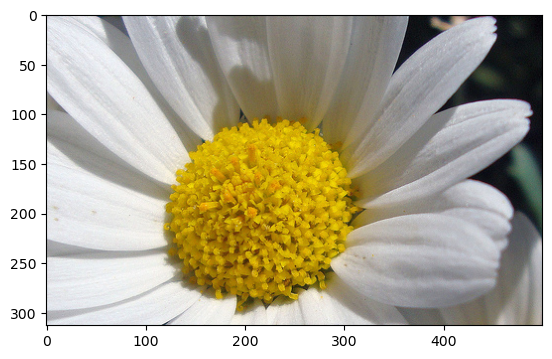

In [19]:
plt.imshow(img)

In [20]:
from sklearn.cluster import KMeans

In [21]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence, and is
 |      theoretically proven to be :math:`\mathcal{O}(\log k)`-optimal.
 |      See the description of `n_init` for mor

In [64]:
k = KMeans(n_clusters=4)
labels = k.fit_predict(img.reshape(img.shape[0]*img.shape[1],img.shape[2]))

In [65]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [66]:
np.unique(labels)

array([0, 1, 2, 3])

In [67]:
k.cluster_centers_

array([[213.83635011, 214.28994722, 215.37460593],
       [139.88287152, 135.82693181, 126.69366914],
       [ 38.14103178,  37.08193579,  29.29955279],
       [183.6211846 , 146.16647078,   8.96295901]])

In [68]:
petal = k.cluster_centers_[0]

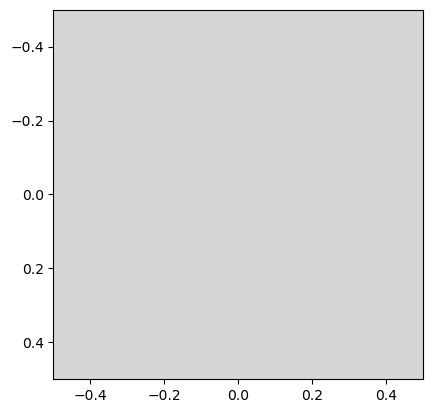

In [69]:
plt.imshow(petal.round(0).astype(int).reshape(1,1,3))

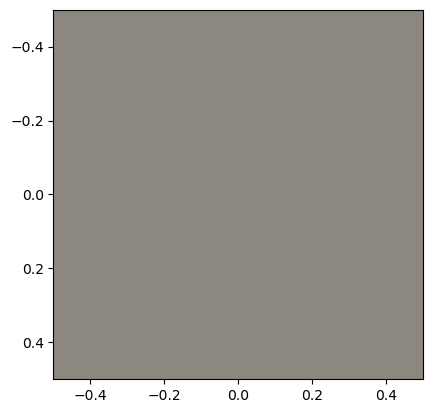

In [70]:
bg = k.cluster_centers_[1]
plt.imshow(bg.round(0).astype(int).reshape(1,1,3))

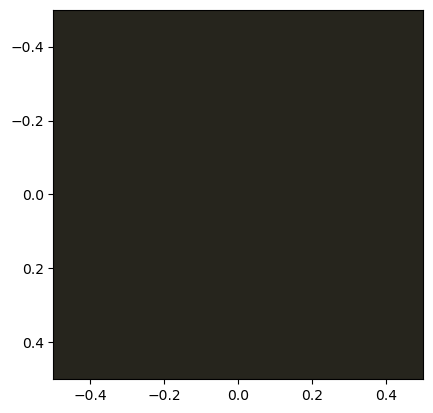

In [71]:
center = k.cluster_centers_[2]
plt.imshow(center.round(0).astype(int).reshape(1,1,3))

In [72]:
labels_temp = labels.copy()

In [73]:
img_clustered = k.cluster_centers_.round(0).astype(int)[labels_temp].reshape(img.shape)

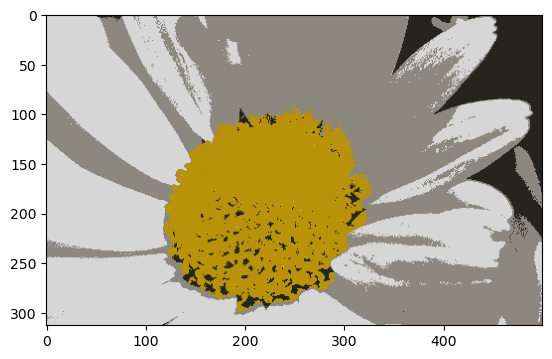

In [74]:
plt.imshow(img_clustered)

In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [27]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
p = os.path.join(os.path.join(os.getcwd(),'images'),'fruits.jpg')

In [31]:
mona = cv2.imread(p)
mona = cv2.cvtColor(mona, cv2.COLOR_BGR2RGB)

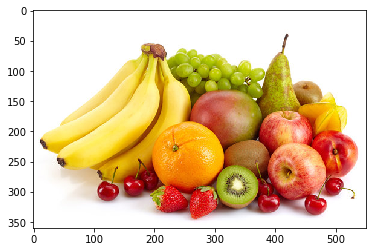

In [32]:
plt.imshow(mona)

In [33]:
mona.shape

(360, 551, 3)

In [39]:
mona_r = cv2.resize(mona,(224,224))

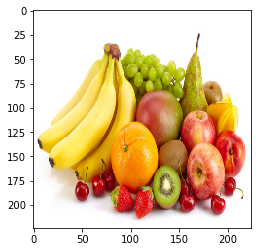

In [40]:
plt.imshow(mona_r)

In [44]:
mona_r.shape

(224, 224, 3)

In [41]:
from tensorflow.keras.applications.vgg16 import preprocess_input

# For single image
normalized_img = preprocess_input(mona_r)

In [46]:
normalized_img.shape

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


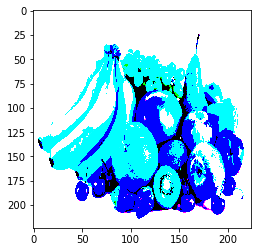

In [42]:
plt.imshow(normalized_img)

In [38]:
np.unique(normalized_img)


array([-1.1677900e+02, -1.1577900e+02, -1.1477900e+02, -1.1377900e+02,
       -1.1277900e+02, -1.1177900e+02, -1.1077900e+02, -1.0977900e+02,
       -1.0877900e+02, -1.0777900e+02, -1.0677900e+02, -1.0577900e+02,
       -1.0477900e+02, -1.0393900e+02, -1.0377900e+02, -1.0293900e+02,
       -1.0277900e+02, -1.0268000e+02, -1.0193900e+02, -1.0177900e+02,
       -1.0093900e+02, -1.0077900e+02, -1.0068000e+02, -9.9939003e+01,
       -9.9778999e+01, -9.8939003e+01, -9.8778999e+01, -9.7939003e+01,
       -9.7778999e+01, -9.6939003e+01, -9.6778999e+01, -9.6680000e+01,
       -9.5939003e+01, -9.5778999e+01, -9.4939003e+01, -9.4778999e+01,
       -9.3939003e+01, -9.3778999e+01, -9.2939003e+01, -9.2778999e+01,
       -9.2680000e+01, -9.1939003e+01, -9.1778999e+01, -9.1680000e+01,
       -9.0939003e+01, -9.0778999e+01, -8.9939003e+01, -8.9778999e+01,
       -8.9680000e+01, -8.8939003e+01, -8.8778999e+01, -8.7939003e+01,
       -8.7778999e+01, -8.7680000e+01, -8.6939003e+01, -8.6778999e+01,
      

In [43]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))



58892288/58889256 [==============================] - 1s 0us/step


In [45]:
base_model

In [69]:
processed_images = np.expand_dims(mona_r, axis=0)

In [70]:
features = base_model.predict(processed_images)

In [71]:
features.shape

(1, 7, 7, 512)

In [72]:
features = np.squeeze(features)  # Remove batch dimension -> (7, 7, 512)
h, w, c = features.shape
flattened_features = features.reshape(-1, c)

In [78]:
from sklearn.decomposition import PCA

# Preserve 95% of variance (adjust based on your data)
pca = PCA(n_components=0.95)
reduced_features = pca.fit_transform(flattened_features) 

In [79]:
from sklearn.cluster import KMeans

# Determine optimal clusters (for medical vs natural images)
k = 10  # Start with 3-5 for most segmentation tasks
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
cluster_labels = kmeans.fit_predict(reduced_features)

C:\Users\rohit\anaconda3\envs\face_recognition_env\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


In [80]:
cluster_labels

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [81]:
len(cluster_labels)

49

In [82]:
# Reshape to original feature map dimensions
seg_mask = cluster_labels.reshape(h, w)  # -> (7,7)

# Upscale to original image size (224x224)
import cv2
final_mask = cv2.resize(seg_mask.astype(float), (224, 224), 
                       interpolation=cv2.INTER_NEAREST)

In [83]:
final_mask = cv2.medianBlur(final_mask.astype(np.uint8), 5)

In [84]:
final_mask.shape

(224, 224)

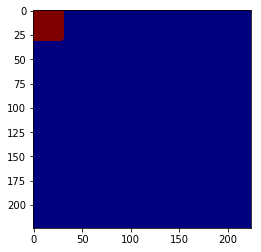

In [85]:
plt.imshow(final_mask, cmap='jet')

In [64]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("happyharrycn/uw-madison-gi-tract-image-segmentation-dataset")

print("Path to dataset files:", path)

100%|██████████| 3.83G/3.83G [01:13<00:00, 55.7MB/s]

Extracting model files...


Path to dataset files: C:\Users\rohit\.cache\kagglehub\datasets\happyharrycn\uw-madison-gi-tract-image-segmentation-dataset\versions\1


In [21]:
import ants
import SimpleITK as sitk
from ipywidgets import interact

ModuleNotFoundError: No module named 'ipywidgets'

In [13]:
path = os.path.join(os.getcwd(), 'assets', 'fsl-open-dev_sub-001_T1w.nii.gz')

In [14]:
raw_img_ants = ants.image_read(path)

In [225]:
sitk.GetArrayFromImage(sitk.ReadImage(path)).shape

(192, 192, 160)

In [15]:
raw_img_ants

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (160, 192, 192)
	 Spacing    : (1.2, 1.25, 1.25)
	 Origin     : (98.1114, 89.5975, -129.5975)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

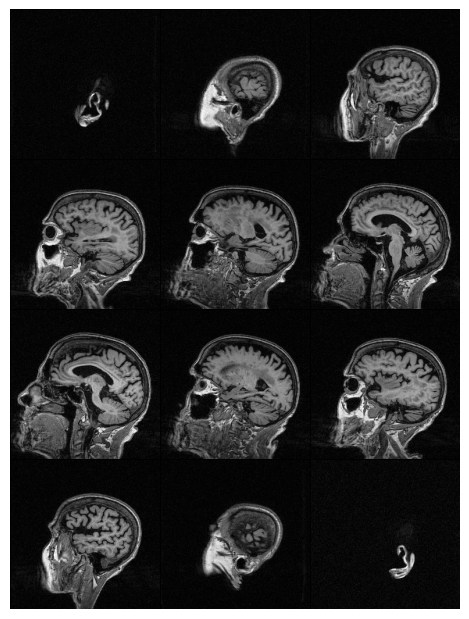

In [16]:
ants.plot(raw_img_ants)

In [18]:
raw_img_ants_np = raw_img_ants.numpy()

In [19]:
raw_img_ants_np.shape

(160, 192, 192)

In [20]:
raw_img_ants_np.shape[0]-1

159

In [22]:
SLICE = (0, 159)

In [59]:
img = raw_img_ants_np[51, :, :]

In [40]:
img.shape

(192, 192)

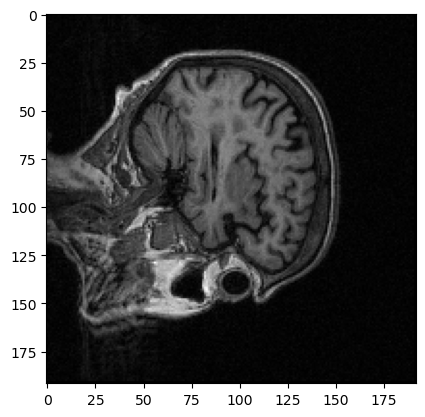

In [41]:
plt.imshow(img, cmap='gray')

In [49]:
denoised_ants = ants.denoise_image(raw_img_ants)

In [60]:
denoised_ants_img = denoised_ants.numpy()[51,:,:]

In [61]:
img = cv2.rotate(img, 2)
denoised_ants_img = cv2.rotate(denoised_ants_img, 2)

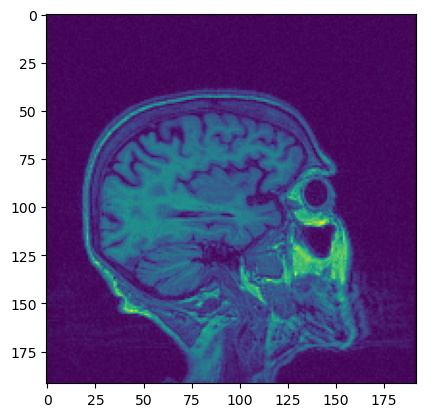

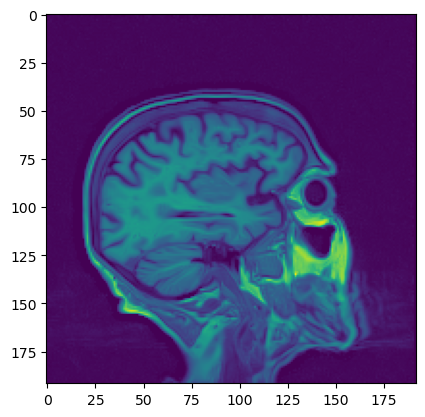

In [62]:
plt.imshow(img, cmap='viridis')
plt.show()
plt.imshow(denoised_ants_img, cmap='viridis')
plt.show()

In [113]:
morph = cv2.medianBlur(img,3)
morph_ = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))

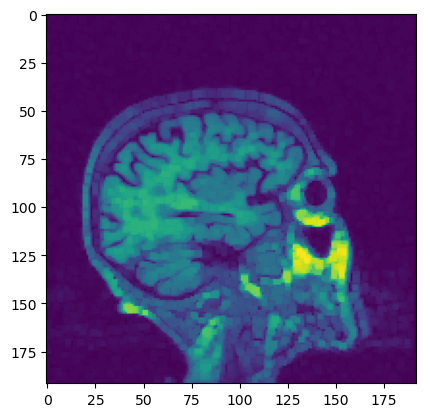

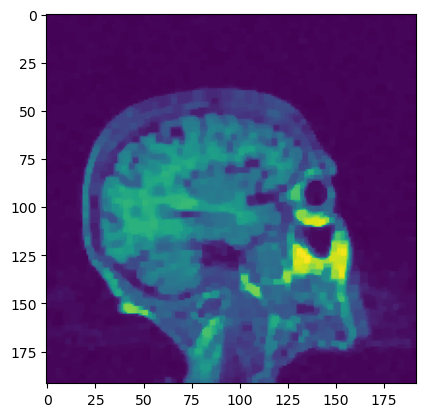

In [116]:
plt.imshow(morph_)
plt.show()
morph__ = cv2.morphologyEx(morph_, cv2.MORPH_CLOSE, np.ones((3,3),np.uint8))
plt.imshow(morph__)

In [149]:
normalized = cv2.normalize(img, None, 0, 255, norm_type=cv2.NORM_MINMAX)

In [155]:
img_ = np.clip(normalized, 0, 255).astype('uint8')

In [200]:
dst = cv2.fastNlMeansDenoising(img_, None, 9, 7, 21)

In [201]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,1))
opened = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel)

''

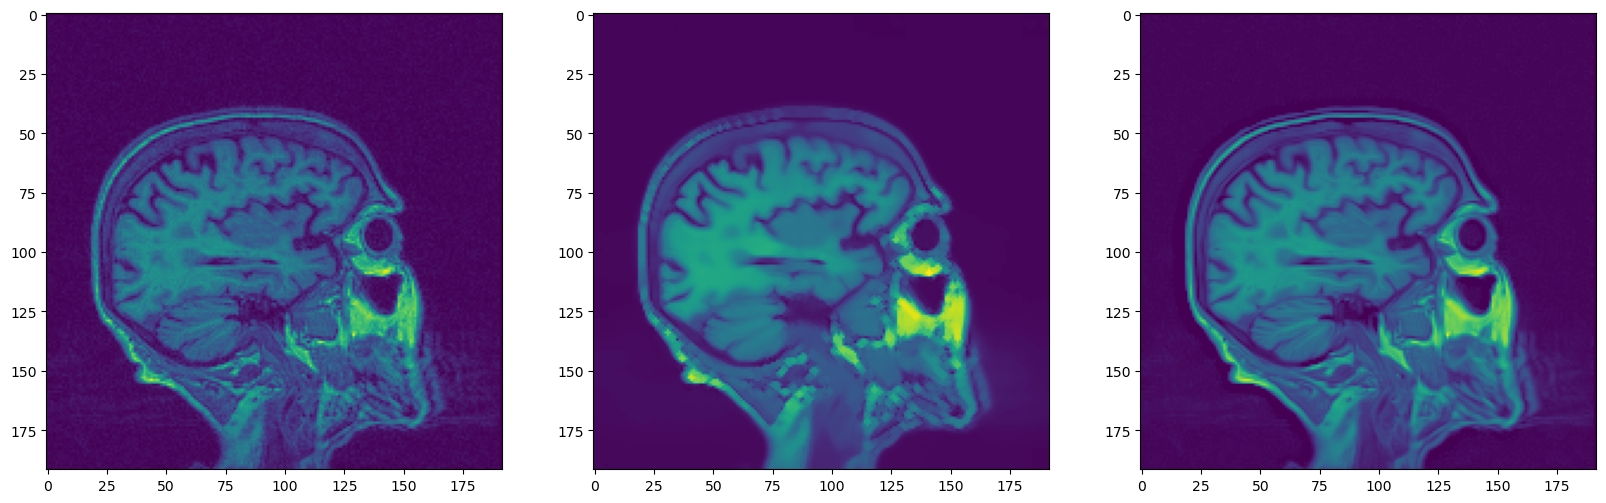

In [192]:
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(20,20))
axes[0].imshow(img)
axes[1].imshow(opened)
axes[2].imshow(denoised_ants_img)
;

''

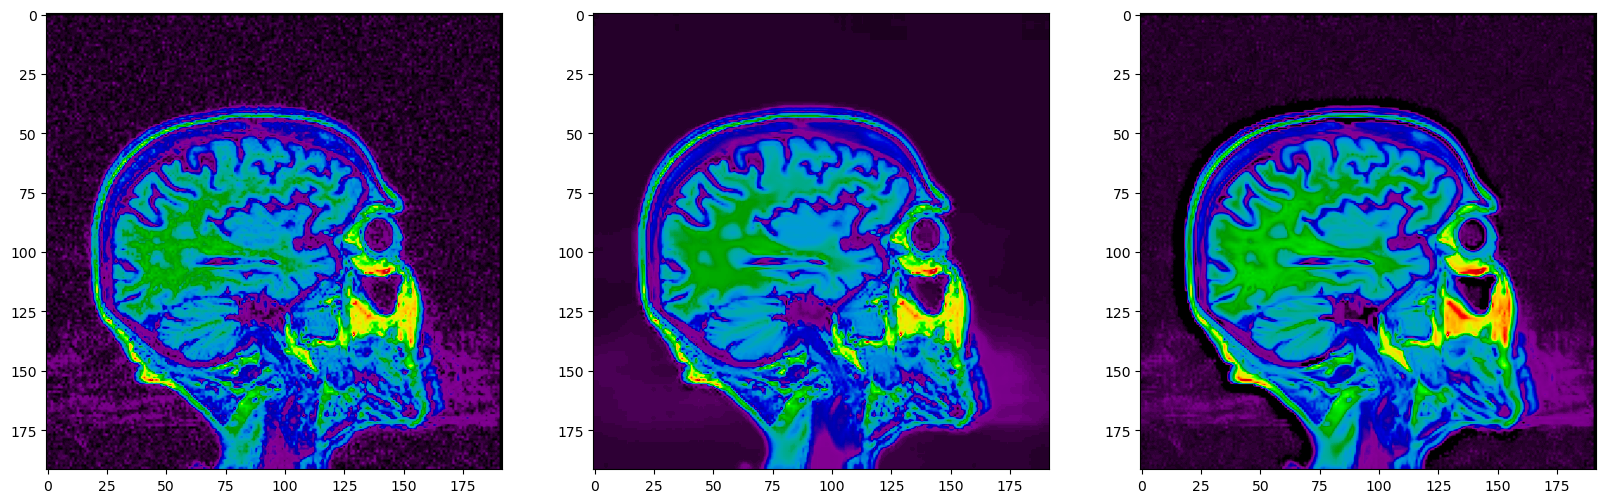

In [217]:
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(20,20))
axes[0].imshow(img,  cmap='nipy_spectral')
axes[1].imshow(opened, cmap='nipy_spectral')
axes[2].imshow(denoised_ants_img, cmap='nipy_spectral')
;

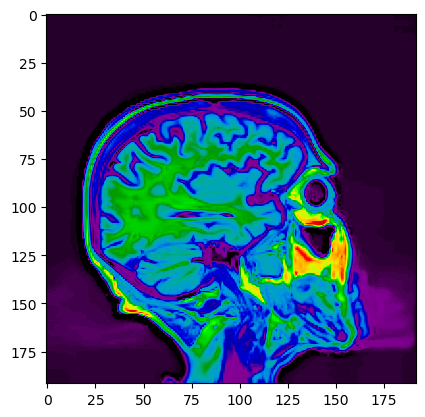

In [216]:
normalized = cv2.normalize(denoised_ants_img, None, 0, 255, norm_type=cv2.NORM_MINMAX)
img__ = np.clip(normalized, 0, 255).astype('uint8')
dst1 = cv2.fastNlMeansDenoising(img__, None, 3, 7, 21)
plt.imshow(dst1, cmap='nipy_spectral')

In [218]:
sitk_image1 = sitk.GetImageFromArray(img)

In [219]:
sitk_image1

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x000001BABC6DF300> >

In [226]:
sitk.GetArrayFromImage(sitk_image1).shape

(192, 192)

In [238]:
volume_np = np.stack([img, opened, denoised_ants_img], axis=0)

In [228]:
volume_np.shape

(2, 192, 192)

In [239]:
sitk_ = sitk.GetImageFromArray(volume_np)

In [240]:
arr = sitk.GetArrayFromImage(sitk_)

In [241]:
arr.shape

(3, 192, 192)

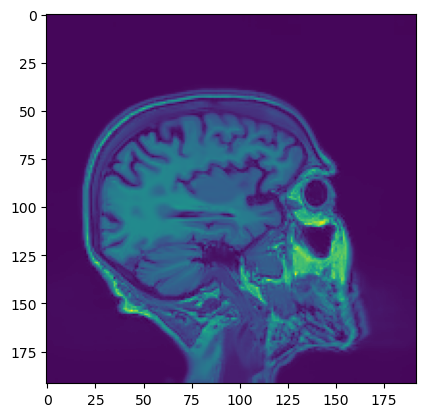

In [237]:
plt.imshow(arr[1,:,:])

In [242]:
transformed = sitk.RescaleIntensity(sitk_, 0, 255)
th = sitk.LiThreshold(transformed,0,1)
msk = th

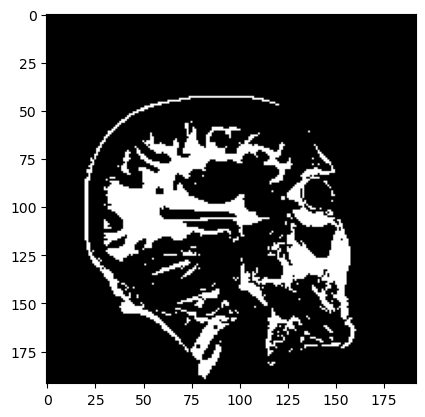

In [246]:
plt.imshow(sitk.GetArrayFromImage(msk)[1,:,:], cmap='gray')

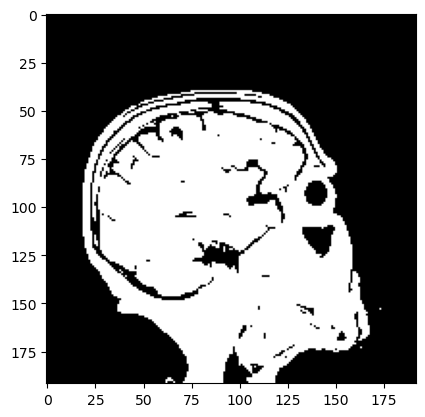

In [247]:
plt.imshow(sitk.GetArrayFromImage(msk)[2,:,:], cmap='gray')

In [267]:
# shrink_factor = 3
# input_image = sitk_
# input_image = sitk.Shrink(input_image, [shrink_factor]*input_image.GetDimension())
# msk_image = sitk.Shrink(msk, [shrink_factor]*msk.GetDimension())

In [268]:
sitk.GetArrayFromImage(input_image).shape

(1, 64, 64)

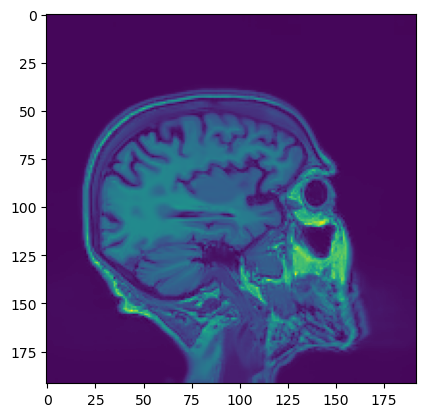

In [264]:
plt.imshow(sitk.GetArrayFromImage(input_image)[1,:,:])

In [269]:
biasCorrection = sitk.N4BiasFieldCorrectionImageFilter()

In [271]:
corrected = biasCorrection.Execute(sitk_, msk)

In [275]:
log_bias_field = biasCorrection.GetLogBiasFieldAsImage(sitk_)

In [276]:
corrected_image_full_res = sitk_/ sitk.Exp(log_bias_field) 

In [279]:
bci = sitk.GetArrayFromImage(corrected_image_full_res)[2,:,:]

''

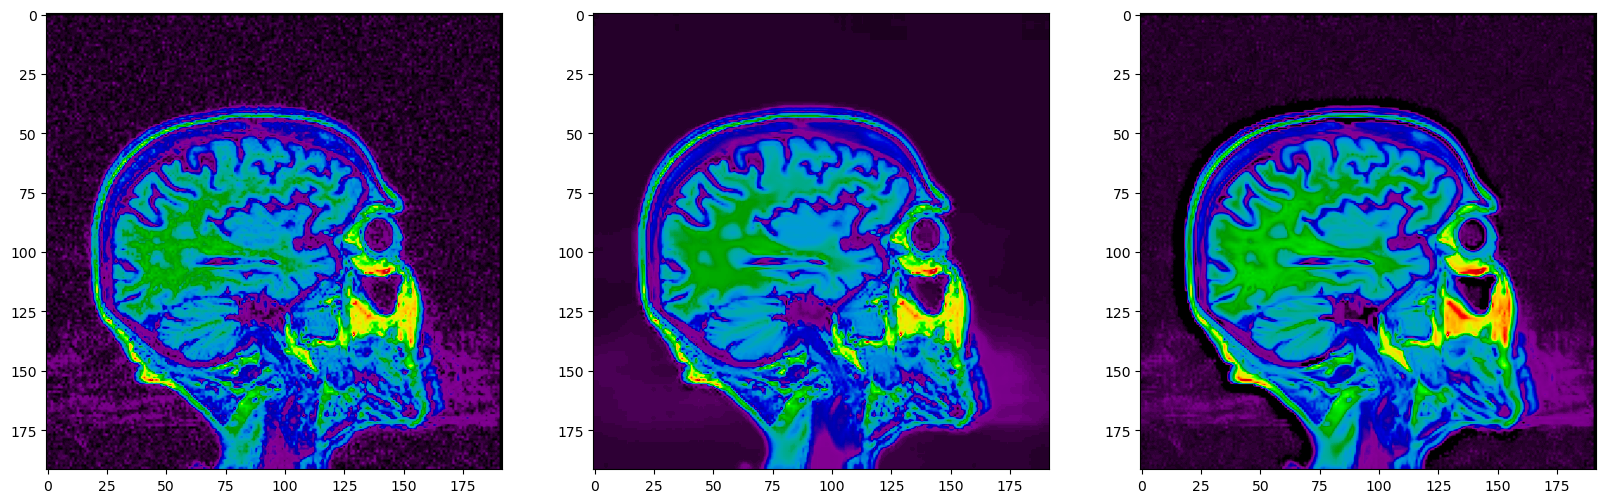

In [280]:
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(20,20))
axes[0].imshow(img,  cmap='nipy_spectral')
axes[1].imshow(opened, cmap='nipy_spectral')
axes[2].imshow(denoised_ants_img, cmap='nipy_spectral')
;

''

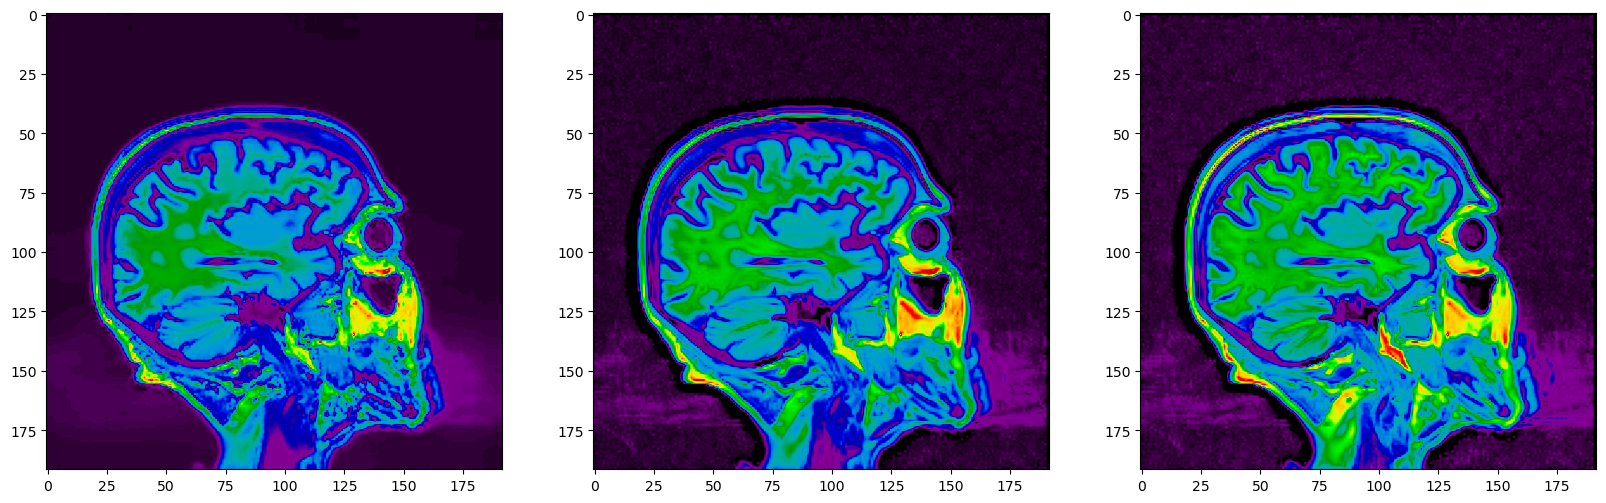

In [281]:
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(20,20))
axes[0].imshow(opened, cmap='nipy_spectral')
axes[1].imshow(denoised_ants_img, cmap='nipy_spectral')
axes[2].imshow(bci,  cmap='nipy_spectral')
;

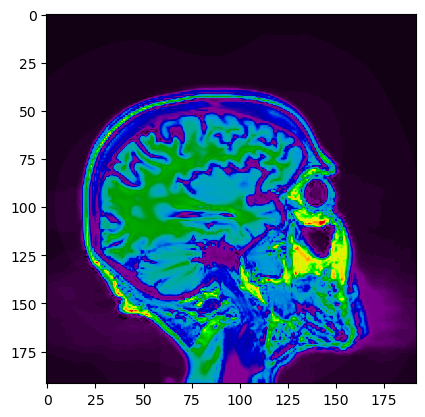

In [282]:
plt.imshow(sitk.GetArrayFromImage(corrected_image_full_res)[1,:,:],cmap='nipy_spectral')

In [291]:
path1 = os.path.join(os.getcwd(), 'assets', 's1.png')
path2 = os.path.join(os.getcwd(), 'assets', 's2.png')
path3 = os.path.join(os.getcwd(), 'assets', 's3.png')
s1 = cv2.imread(path1,0)
s2 = cv2.imread(path2,0)
s3 = cv2.imread(path3,0)

''

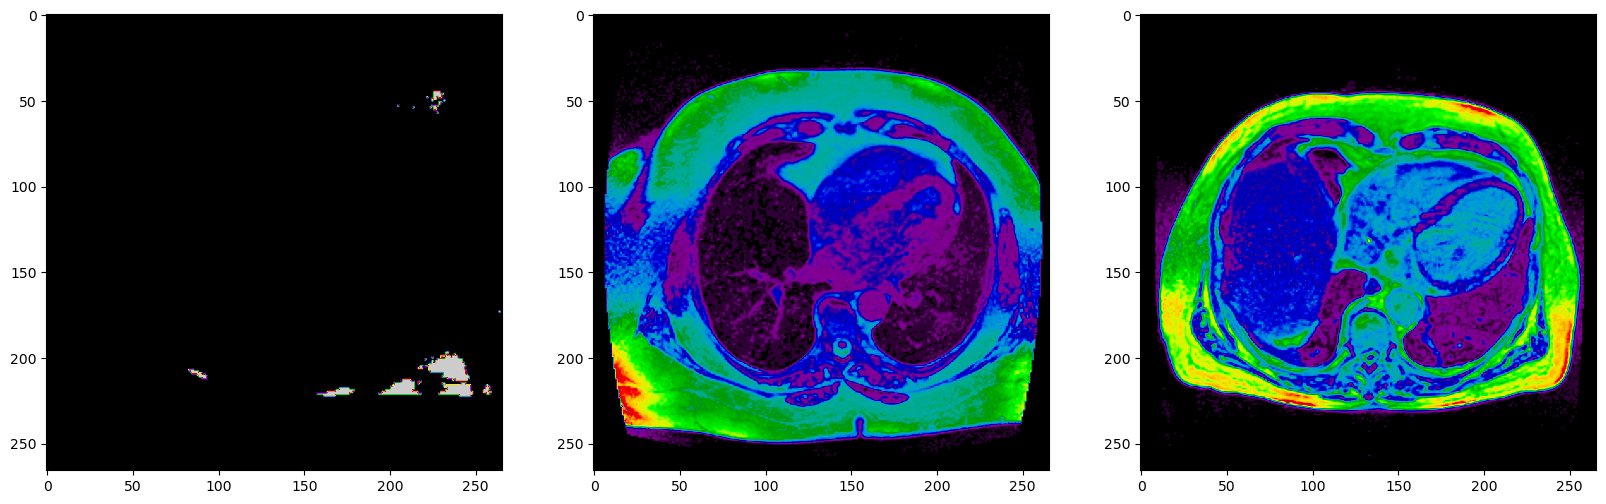

In [294]:
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(20,20))
axes[0].imshow(s1, cmap='nipy_spectral')
axes[1].imshow(s2, cmap='nipy_spectral')
axes[2].imshow(s3,  cmap='nipy_spectral')
;

In [296]:
def normalize_mri(img, window_center=50, window_width=400):
    img_min = window_center - window_width//2
    img_max = window_center + window_width//2
    return np.clip((img - img_min) / (img_max - img_min), 0, 1)

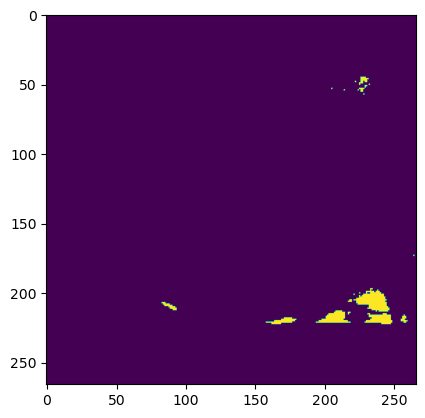

In [299]:
plt.imshow(normalize_mri(s1))

In [302]:
np.mean(s2), np.mean(s3)

(7.344267623947085, 7.7763016563966305)

In [ ]:
volume_np = np.stack([s2,s3], axis=0)
sitk_ = sitk.GetImageFromArray(volume_np)